<a href="https://colab.research.google.com/github/hfernandescfc/House_Predictions/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.max_columns', None)
import missingno as msno


In [5]:
path = '/content/'

test = 'test.csv'
train = 'train.csv'

In [6]:
train_df = pd.read_csv(path + train)
test_df = pd.read_csv(path + test)

copy_train = train_df.copy()
copy_test = test_df.copy()

dfs_copied = [copy_train, copy_test]

#FRAMEWORK

1. Understand Data
2. Data Preprocessing
3. EDA
4. Feature Engineering*
5. Model Deployment
6. Evaluate
7. Redeploy

## Understanging Data

In [7]:
print("Train data frame shape:" + str(copy_train.shape))
print("\n"+"-" * 100)
print("Test data frame shape:" + str(copy_test.shape))
print("\n"+"-" * 100)

Train data frame shape:(1460, 81)

----------------------------------------------------------------------------------------------------
Test data frame shape:(1459, 80)

----------------------------------------------------------------------------------------------------


In [8]:
print(copy_train.columns)
print('\n')
print(copy_train.info())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
copy_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Basic Cleaning

In [10]:
dtypes = ['category', 'int', 'float64']

for df in dfs_copied:
  df = df.drop(columns = 'Id', inplace=True)


Categorical = copy_train.select_dtypes(include='object')

Numerical = copy_train.columns[~copy_train.columns.isin([Categorical])]

for d in dfs_copied:
  for c in Categorical.columns:
    d[c] = d[c].astype('category')

## Dealing with Missing data

In [11]:
missing_totals = copy_train.isnull().sum().sort_values(ascending=False)

missing_percentuals = (copy_train.isnull().sum()/len(copy_train)).sort_values(ascending=False)

missing_df = pd.concat([missing_totals, missing_percentuals], axis = 1, keys = ['Values Missing', 'Percent Missing'])

missing_columns = missing_df[missing_df['Values Missing'] > 0].index

display(missing_df[missing_df['Values Missing'] > 0])

print('\n')

print(missing_columns)

,Values Missing,Percent Missing
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479




Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')


Although it is a good practice to keep as much data as possible, I decided to remove the features which had more than 50% of missing values.

In [12]:
Threeshold = 0.5

Beyond_Threeshold = missing_df[missing_df['Percent Missing'] > Threeshold].index

copy_train = copy_train.drop(columns = Beyond_Threeshold)

print(copy_train.columns)



Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [13]:
dtypes = ['category', 'int', 'float']

Categorical = copy_train.select_dtypes(include='object')

Numerical = copy_train.columns[~copy_train.columns.isin([Categorical])]

for d in dfs_copied:
  for c in Categorical.columns:
    d[c] = d[c].astype('category')

Now, I'll proceed to analyse each feature individually in order to preserve as much information as I can

In [14]:
def order_mapping(df, columns, dict):

  df[columns] = df[columns].cat.add_categories("NA").fillna(value="NA")

  df[columns] = df[columns].map(dict)

  df[columns] = df[columns].fillna(0)


### FireplaceQu

In [15]:
#copy_train['FireplaceQu'].value_counts(ascending=False)

grade_dict = {'NA': 0, 'Po':1, 'Fa':2, 'TA' : 3, 'Gd':4, 'EX' :5}

#g_without_nan = g.cat.add_categories("D").fillna("D")

order_mapping(copy_train, 'FireplaceQu', grade_dict)

#copy_train['FireplaceQu'] = copy_train['FireplaceQu'].fillna(0)

fig = px.box(copy_train, x = 'FireplaceQu', y = 'SalePrice', points = 'all')

fig.show()


### LotFrontage

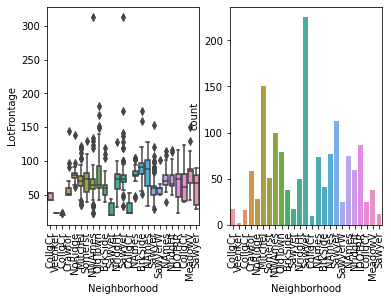

<Figure size 800x400 with 0 Axes>

In [16]:
#copy_train.groupby(by='Neighborhood')['LotFrontage'].median()

fig, axs = plt.subplots(ncols = 2)

from matplotlib.pyplot import figure

figure(figsize=(8, 4), dpi=100)

g = sns.boxplot(data = copy_train, x = 'Neighborhood', y = 'LotFrontage', ax = axs[0] )

g.set_xticklabels(labels = copy_train['Neighborhood'], rotation=90)

g= sns.countplot(data= copy_train, x = 'Neighborhood', ax = axs[1])

g.set_xticklabels(labels = copy_train['Neighborhood'], rotation=90)

#plt.xticks(rotation = 70)

plt.show()

copy_train["LotFrontage"] = copy_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#copy_train = copy_train.drop(columns='LotFrontage')

### Garage Features

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

Garage_dict = {'NA': 0, 'Po':1, 'Fa':2, 'TA' : 3, 'Gd':4, 'EX' :5}

order_mapping(copy_train, 'GarageCond', Garage_dict)

order_mapping(copy_train, 'GarageQual', Garage_dict)

copy_train['GarageYrBlt'] = copy_train['GarageYrBlt'].fillna(0)

enc = OneHotEncoder()

garages = ['GarageType', 'GarageFinish']

for col in garages:
  copy_train[col] = copy_train[col].cat.add_categories("NA").fillna(value="NA")
  
"""transformer = make_column_transformer((OneHotEncoder(), 
                                       garages),
                                       remainder = 'passthrough')

transformed = transformer.fit_transform(copy_train)

transformed_copy_train = pd.DataFrame(transformed, columns = transformer.get_feature_names())"""

#for col in garages:
#  copy_train[col] = enc.fit_transform(copy_train[[col]])

"transformer = make_column_transformer((OneHotEncoder(), \n                                       garages),\n                                       remainder = 'passthrough')\n\ntransformed = transformer.fit_transform(copy_train)\n\ntransformed_copy_train = pd.DataFrame(transformed, columns = transformer.get_feature_names())"

### Basement Features

In [18]:
#'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1'

bsmt_cols = ['BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']

ord_bsmt = ['BsmtQual', 'BsmtCond']

bsmt_cat = list(set(bsmt_cols)-set(ord_bsmt))

for col in ord_bsmt :
  order_mapping(copy_train, col, grade_dict)

for col in bsmt_cat:
  copy_train[col] = copy_train[col].cat.add_categories("NA").fillna(value="NA")

"""transformer = make_column_transformer((OneHotEncoder(), 
                                       bsmt_cat),
                                       remainder = 'passthrough')

transformed = transformer.fit_transform(copy_train)

transformed_copy_train = pd.DataFrame(transformed, columns = transformer.get_feature_names())"""

#copy_train[]

#for col in list(set(bsmt_cols)-set(ord_bsmt)):
#  copy_train[col] =labelencoder.fit_transform(copy_train[col])

#for col in bsmt_cols:
#  print(str(col) + '\n') 
#  print(transformed_copy_train[col].value_counts(ascending=False))

"transformer = make_column_transformer((OneHotEncoder(), \n                                       bsmt_cat),\n                                       remainder = 'passthrough')\n\ntransformed = transformer.fit_transform(copy_train)\n\ntransformed_copy_train = pd.DataFrame(transformed, columns = transformer.get_feature_names())"

In [19]:
#transformed_copy_train.head()

### Masonry

In [20]:
copy_train['MasVnrType'] = copy_train['MasVnrType'].cat.add_categories("NA").fillna('NA')

copy_train['MasVnrArea'] = copy_train.groupby('Neighborhood')['MasVnrArea'].transform(
    lambda x: x.fillna(x.median()))



### Electrical

In [21]:
copy_train['Electrical'] = copy_train['Electrical'].fillna(copy_train['Electrical'].mode()[0])

In [22]:
copy_train.isna().sum().sort_values(ascending=False)

MSSubClass     0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 76, dtype: int64

No more missing values :)

## EDA

This section is where we can get a better grasp of the data. The goal here is to check the relationship between the features so we can properly build the right model for the kind of data that is available.

In [23]:
X_train = copy_train.drop(columns='SalePrice')

Y_train = copy_train.loc[:, 'SalePrice']

Categorical = X_train.select_dtypes(include='category')

Numerical = X_train.select_dtypes(include=['int', 'float'])



In [24]:
Numerical.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.405479,3.074658,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.743151,1868.739726,1.767123,472.980137,2.800000,2.802055,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.733343,1.190222,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,1.778071,453.697295,0.747315,213.804841,0.727224,0.722589,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,1958.000000,1.000000,334.500000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1.000000,1977.000000,2.000000,480.000000,3.000000,3.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,165.250000,4.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,4.000000,2001.000000,2.000000,576.000000,3.000000,3.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,2010.000000,4.000000,1418.000000,4.000000,4.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


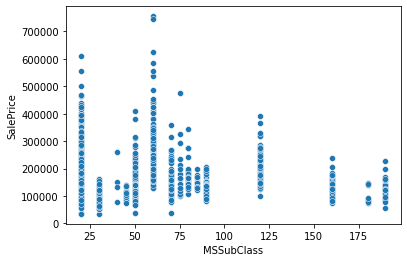

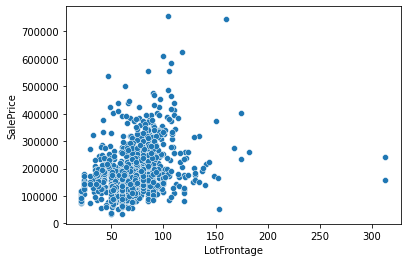

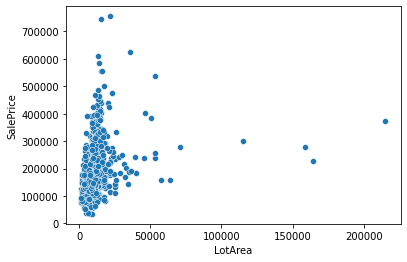

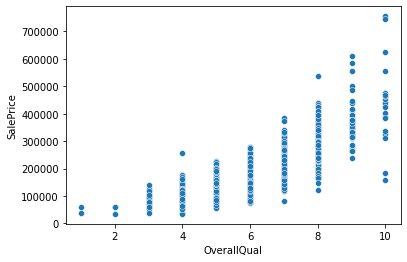

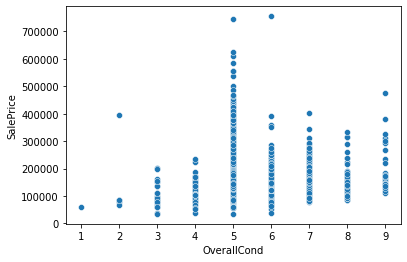

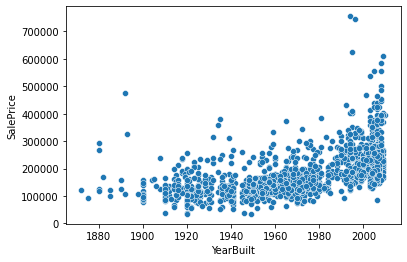

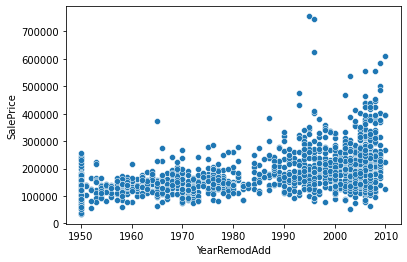

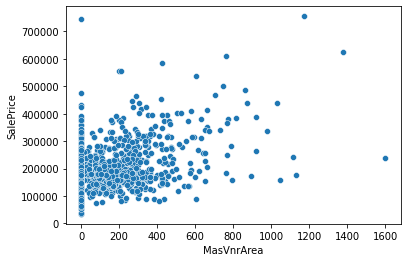

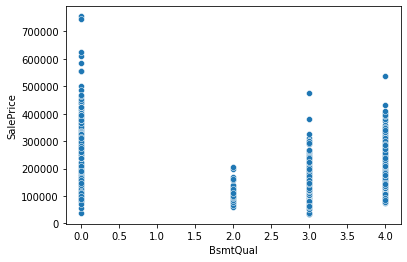

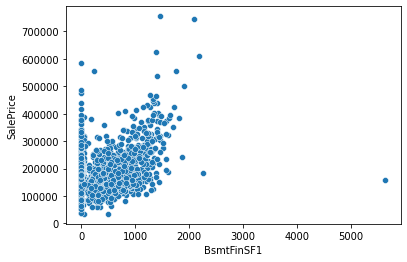

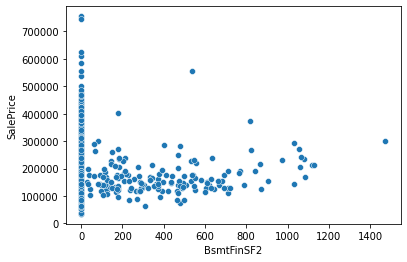

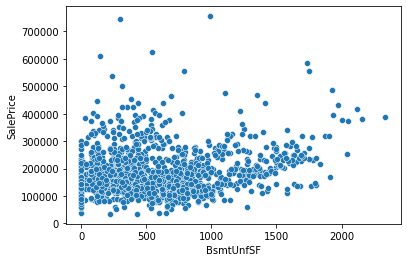

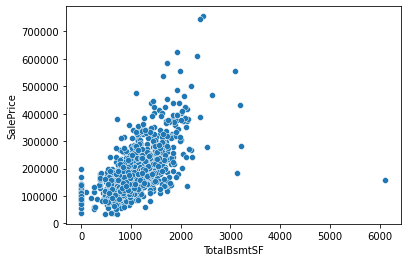

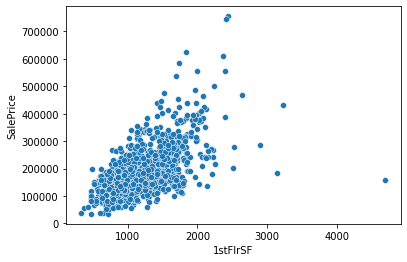

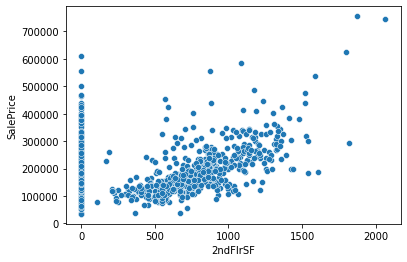

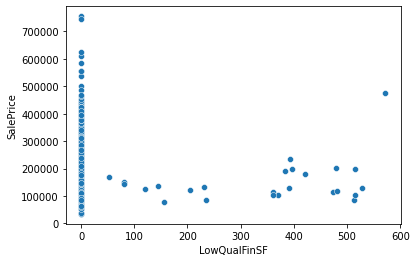

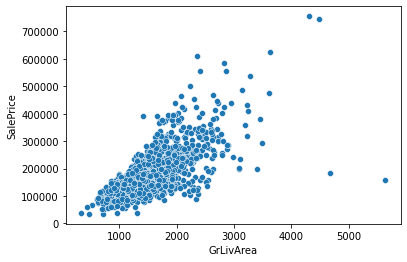

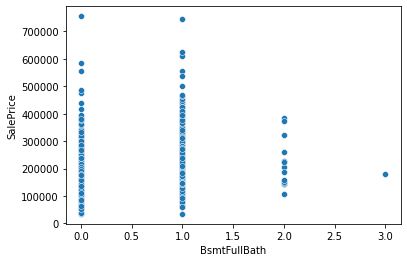

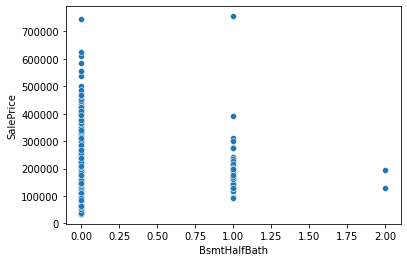

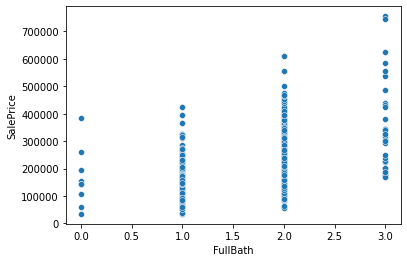

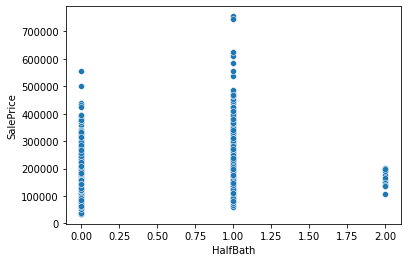

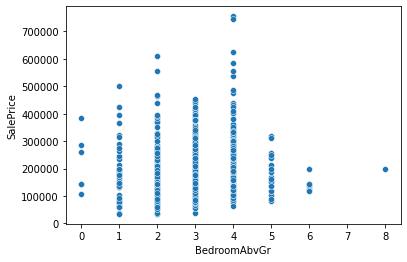

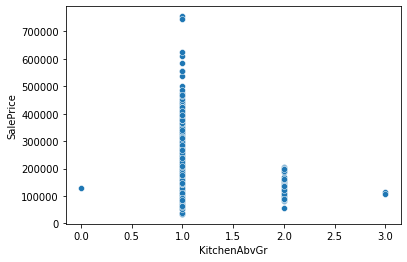

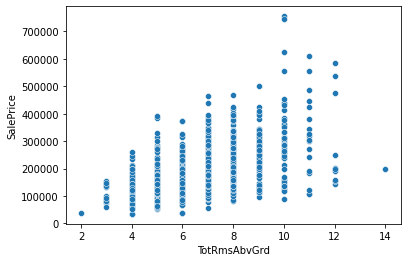

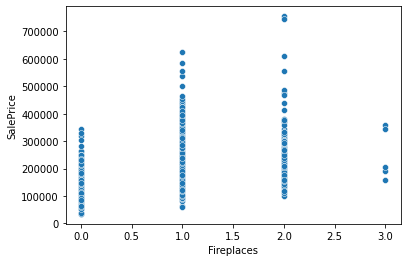

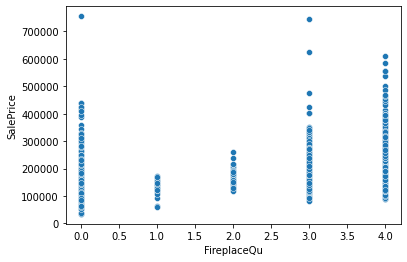

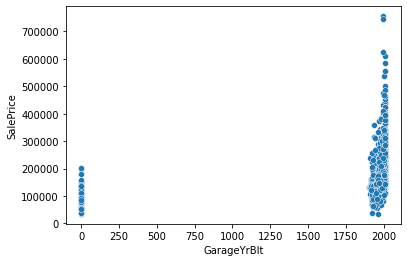

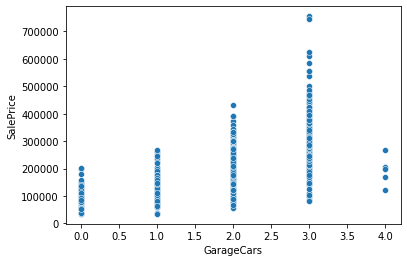

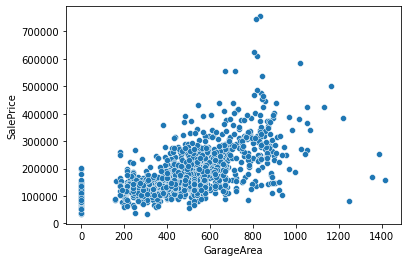

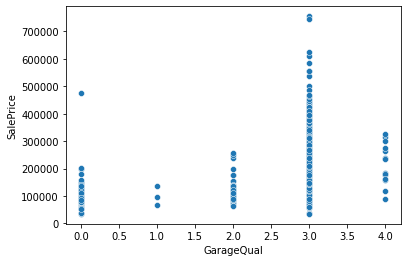

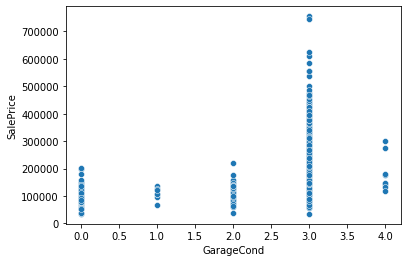

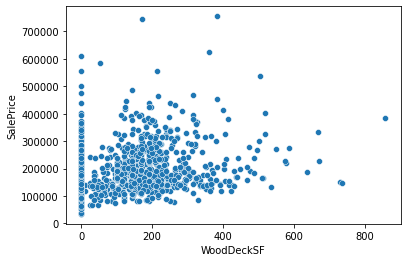

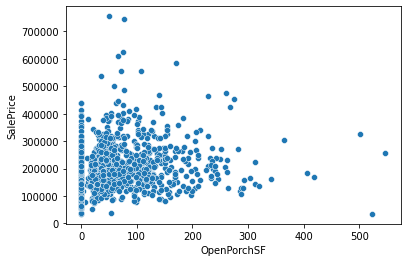

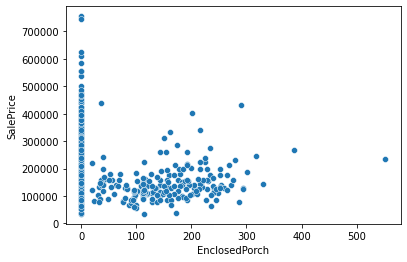

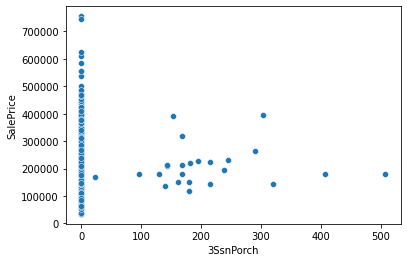

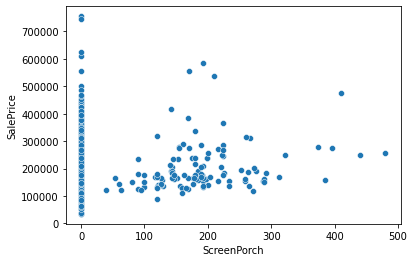

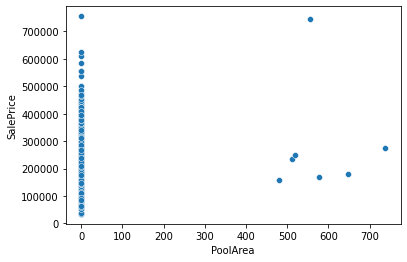

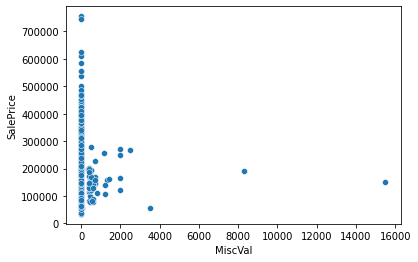

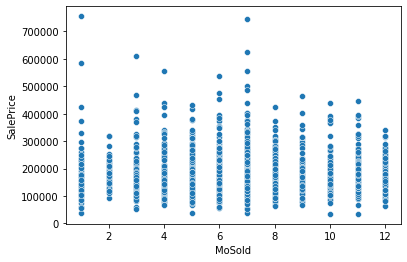

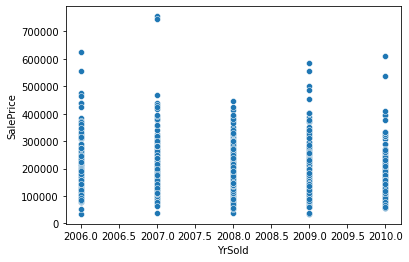

In [25]:
for i in range(len(Numerical.columns)):
  sns.scatterplot(x=Numerical.iloc[:,i], y =Y_train)
  plt.show()

Try to add another collumn of plots showing the countplot of each categorical feature

In [26]:
copy_train = copy_train.drop(copy_train[copy_train['GrLivArea'] > 4500].index)

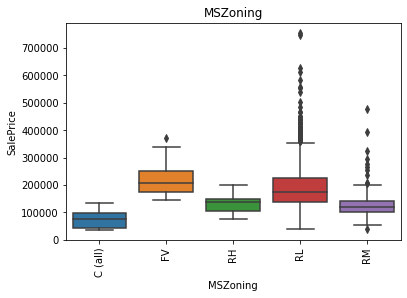

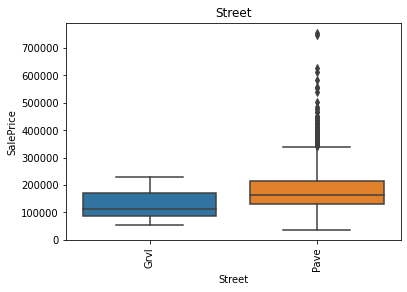

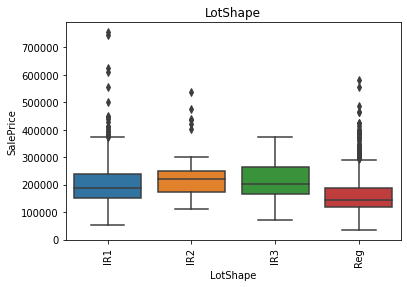

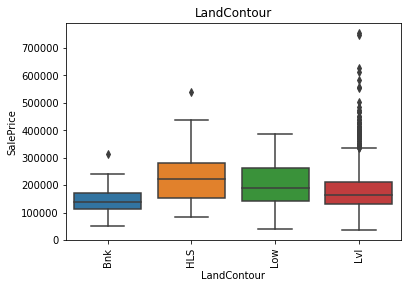

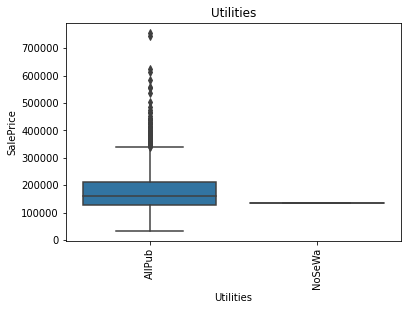

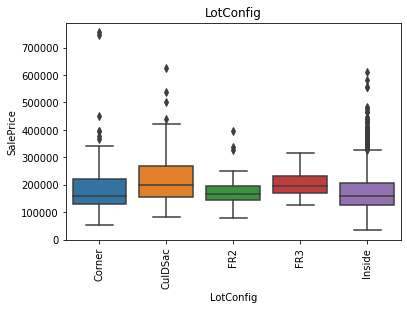

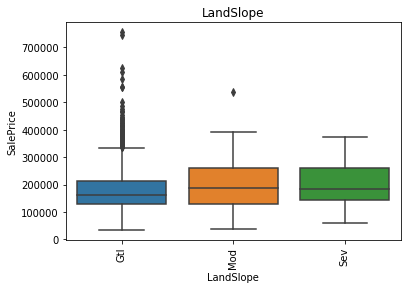

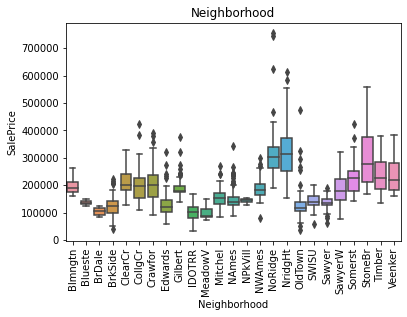

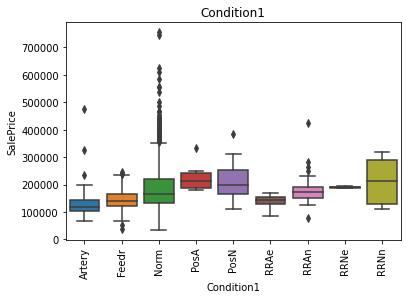

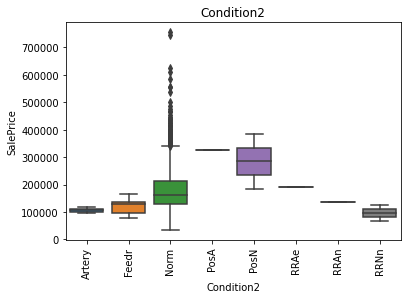

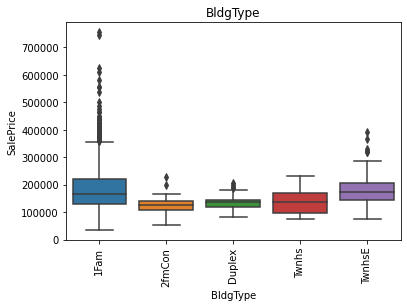

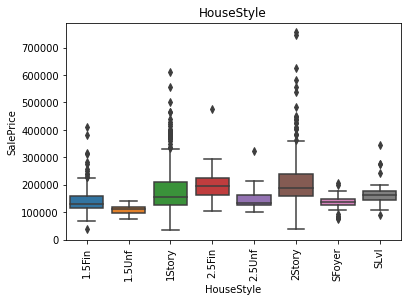

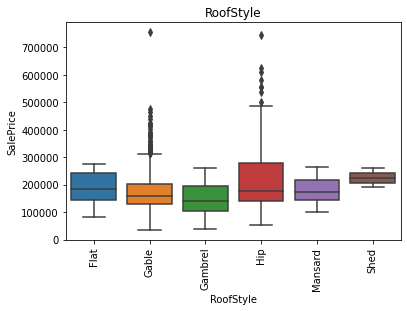

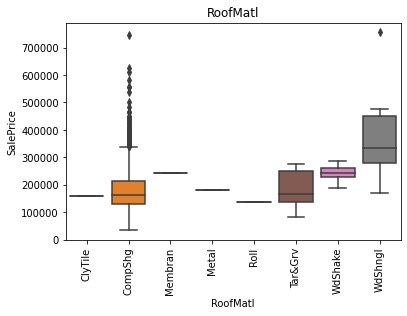

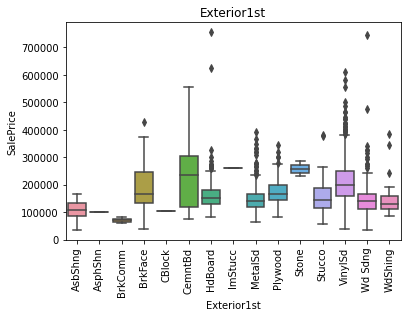

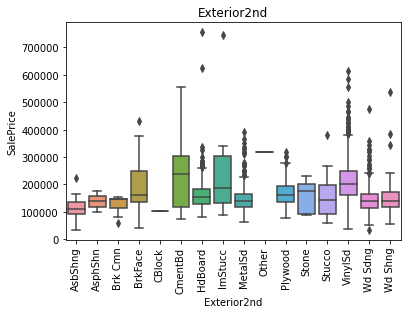

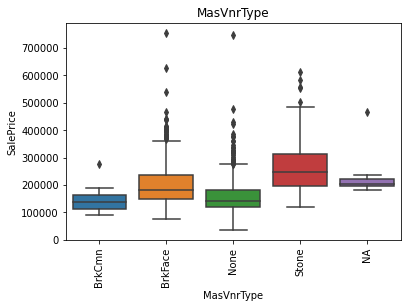

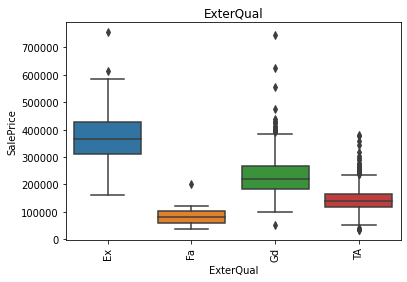

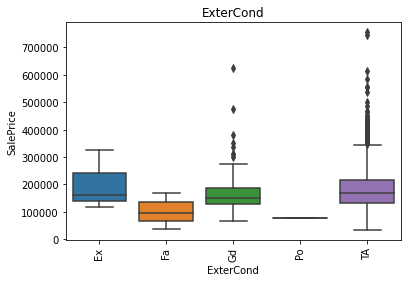

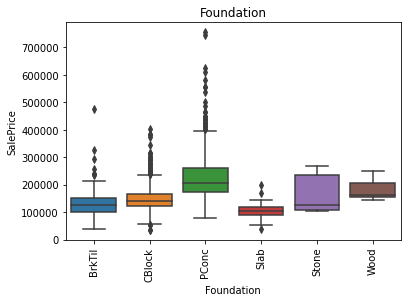

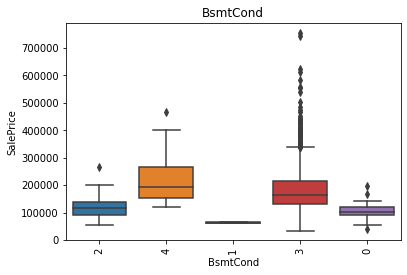

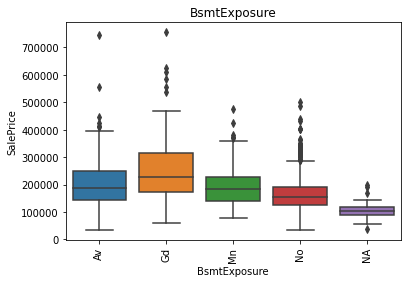

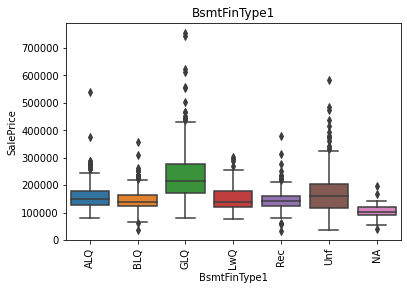

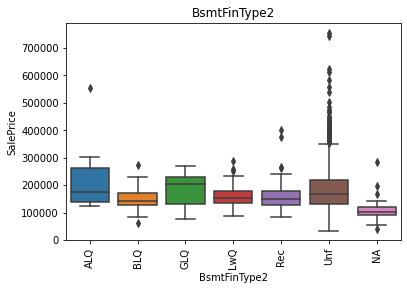

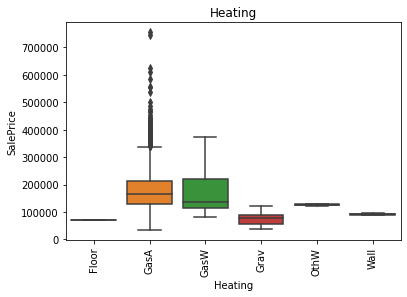

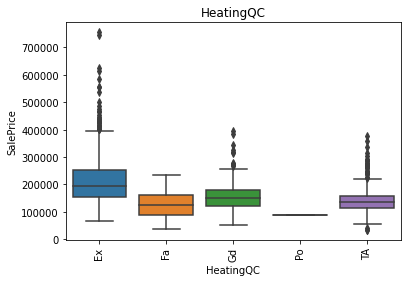

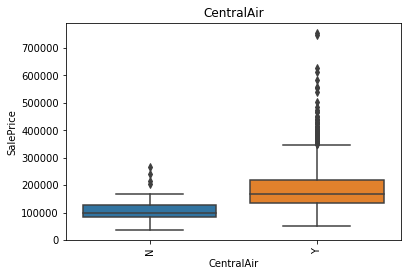

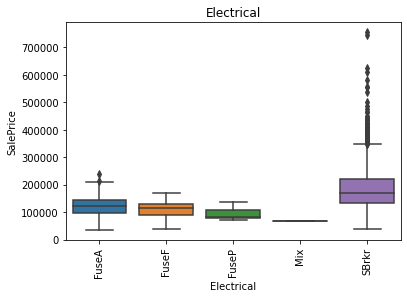

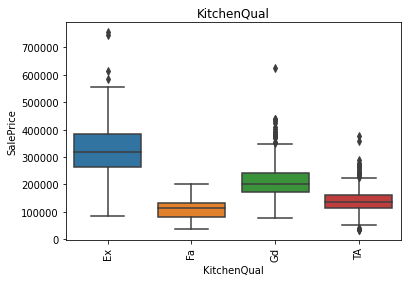

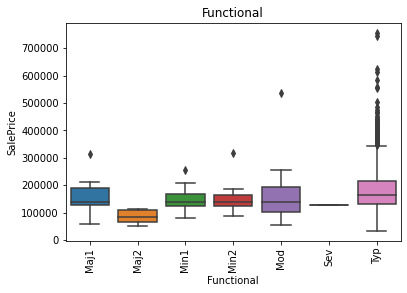

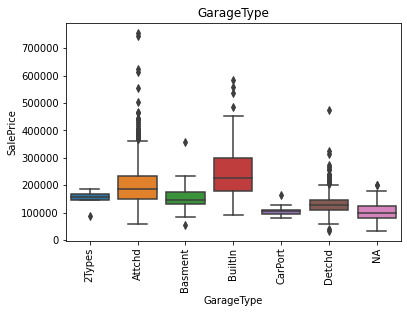

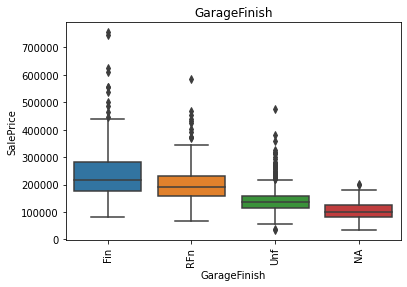

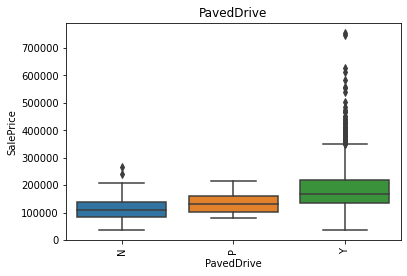

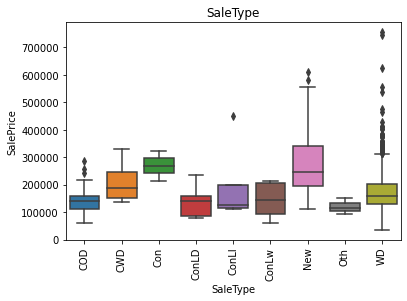

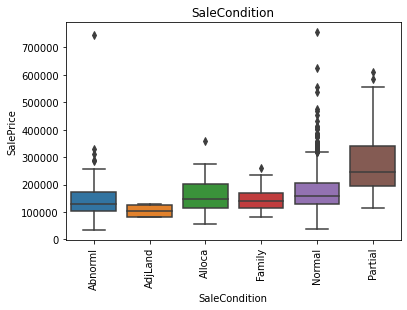

In [27]:
for i in range(len(Categorical.columns)):
  sns.boxplot(x=Categorical.iloc[:,i], y =Y_train)
  plt.title(Categorical.columns[i])
  plt.xticks(rotation = 90)
  plt.show()

From the scatter and box plots, it seems that there may be some significant outliers present on our data. We will come back to it if our residual plots indicates that this is affecting our models.

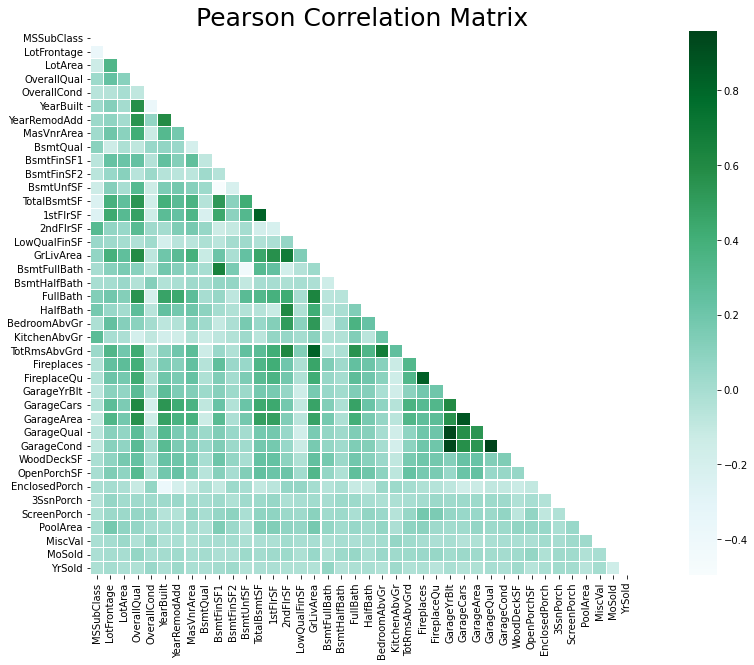

In [28]:
corr = X_train.corr()

plt.rcParams["figure.figsize"] = (20, 10)

mask = np.zeros_like(X_train.corr(), dtype=bool) 

mask[np.triu_indices_from(mask)] = True 

plt.title('Pearson Correlation Matrix',fontsize=25)

f = sns.heatmap(X_train.corr(), square = True, cmap="BuGn", linewidths = 0.2, mask = mask)#linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            #linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9})

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



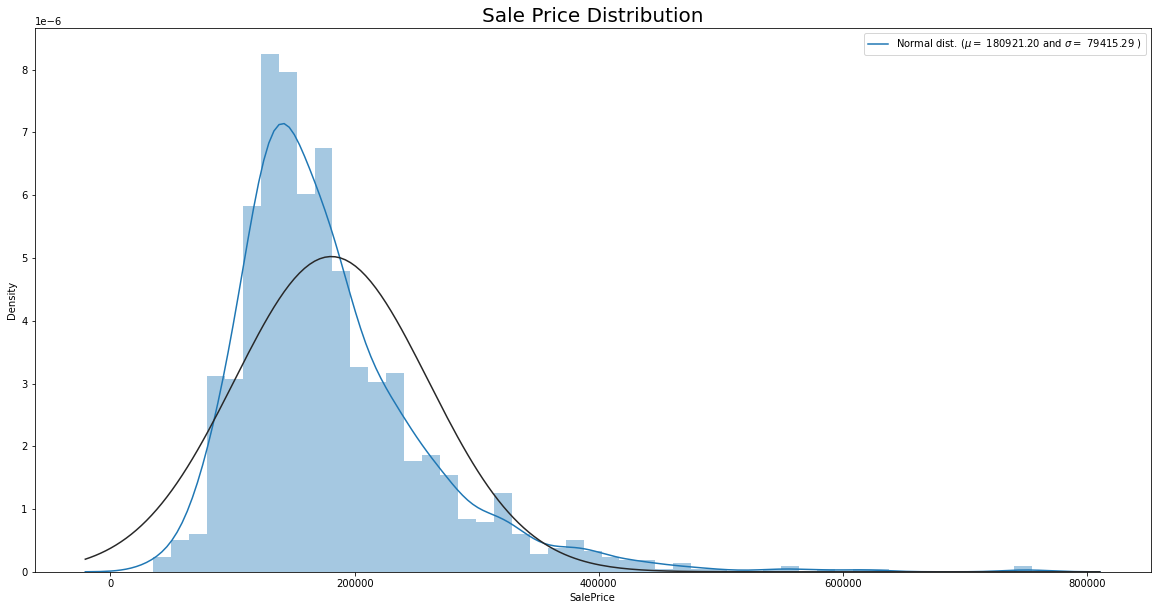

In [29]:
sns.distplot(Y_train, fit = norm)

mu, sigma = norm.fit(Y_train)

plt.title('Sale Price Distribution',fontsize=20)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

plt.show()

The Histogram of SalePrice shows that the distribution is skewed to the right. Although normality is not an assumption for the linear models that will be deployed in this notebook, it might be benefical to transform the dependent variable in order to achieve better predictions.

In [30]:
y_corr = copy_train.corr()

y_corr = y_corr['SalePrice'].sort_values(ascending=False)

top_10_y = y_corr.nlargest(11)[1:]

print(top_10_y)

OverallQual     0.795774
GrLivArea       0.734968
TotalBsmtSF     0.651153
GarageCars      0.641047
1stFlrSF        0.631530
GarageArea      0.629217
FullBath        0.562165
TotRmsAbvGrd    0.537769
YearBuilt       0.523608
YearRemodAdd    0.507717
Name: SalePrice, dtype: float64


From a simple analysis of the features it is clear that OverallQual and GrLivArea are the predictors with the highest linear correlation to SalePrice. 

### Feature Engineering

I will not try to do anything fancy here although I believe I could achieve some better results by combining some of the predictors, the focus here will be on adjusting data to fit our linear models.

In [31]:
display(copy_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1458 non-null   int64   
 1   MSZoning       1458 non-null   category
 2   LotFrontage    1458 non-null   float64 
 3   LotArea        1458 non-null   int64   
 4   Street         1458 non-null   category
 5   LotShape       1458 non-null   category
 6   LandContour    1458 non-null   category
 7   Utilities      1458 non-null   category
 8   LotConfig      1458 non-null   category
 9   LandSlope      1458 non-null   category
 10  Neighborhood   1458 non-null   category
 11  Condition1     1458 non-null   category
 12  Condition2     1458 non-null   category
 13  BldgType       1458 non-null   category
 14  HouseStyle     1458 non-null   category
 15  OverallQual    1458 non-null   int64   
 16  OverallCond    1458 non-null   int64   
 17  YearBuilt      1458 non-null   in

None

In [32]:
copy_train['BsmtCond'] = copy_train['BsmtCond'].astype('int64') #fix

In [33]:
#transform remaining ordinal features to numerical

remaining_ordinal = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']



for col in remaining_ordinal:
  order_mapping(copy_train, col, grade_dict)


In [34]:
#OneHotEncoding remaning categorical variables

Categorical = copy_train.select_dtypes(include='category').columns

transformer = make_column_transformer((OneHotEncoder(), 
                                       Categorical),
                                       remainder = 'passthrough')

transformed = transformer.fit_transform(copy_train)

transformed_copy_train = pd.DataFrame(transformed, columns = transformer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [35]:
transformed_copy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 249 entries, onehotencoder__x0_C (all) to SalePrice
dtypes: float64(249)
memory usage: 2.8 MB


In [36]:
X_train = transformed_copy_train.drop(columns='SalePrice')

Y_train = transformed_copy_train.loc[:, 'SalePrice']

#Important for some linear models to have the variance of each feature in the same order of magnitude

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

scale.fit(X_train[Numerical.columns])

X_train[Numerical.columns] = scale.transform(X_train[Numerical.columns])

### Model Deployment

In [37]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [38]:
model_ridge = Ridge()


alphas = [0.1, 1, 5, 10, 50]

cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

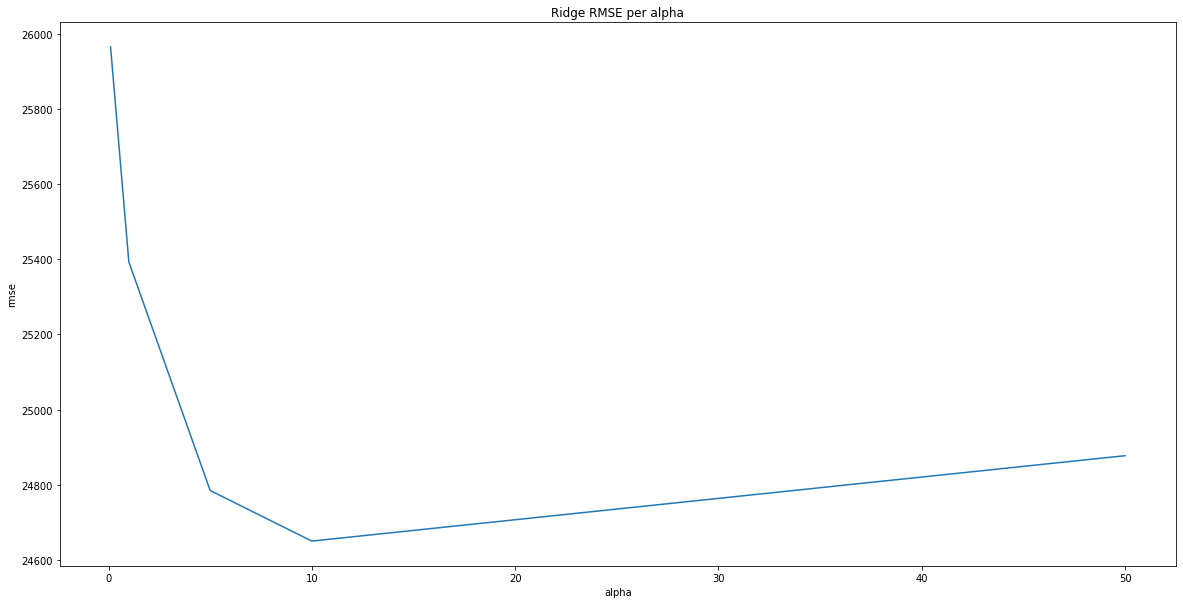

In [39]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Ridge RMSE per alpha")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [40]:
model_ridge = Ridge(alpha = 10)

model_ridge.fit(X_train, Y_train)


Ridge(alpha=10)

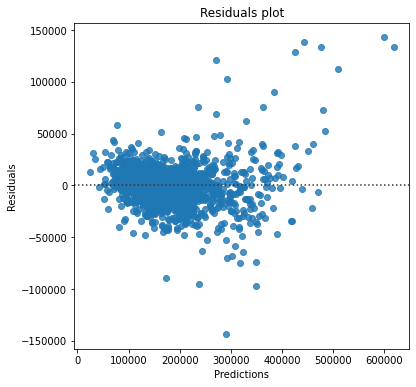

In [41]:
preds = model_ridge.predict(X_train)

residuals = Y_train - preds

res_frame = pd.DataFrame({'preds':preds, 'residuals': residuals})

plt.rcParams['figure.figsize'] = (6.0, 6.0)

sns.residplot(x = preds, y = residuals)

plt.title('Residuals plot')

plt.ylabel('Residuals')

plt.xlabel('Predictions')

plt.show()

Overall the residuals plot indicates that the error terms have non constant variance, wich means, heteroscedasticity. To tackle this problem the common approach is transforming the response variable Y. It also suggests that it's possible to increase the model performance by removing outliers.

In [42]:
copy_train['SalePrice'] = np.log(copy_train['SalePrice'])